In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
data = pd.read_csv("Advertising.csv")
data.head()



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
data.shape

(200, 5)

# **process dataset and apply linear regression** #
1.remove unwanted column
2.split dataset into train and test

In [3]:
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(Xs,y,test_size = 0.3) #Train is 70% and Test is 30% 
#x_train, x_test, y_train, y_test = train_test_split(Xs,y,random_state=1) # default split is 75% for training and 25% for testing
# 200 records : 75% train = 150 and 25% test = 50
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
reg = LinearRegression()
reg.fit(x_train, y_train)

(140, 3)
(60, 3)
(140, 1)
(60, 1)


LinearRegression()

# **Step 4: Display Values of Slope and Intercept and Infer from it**

**Linear Model is: y=2.88+0.0466×TV+0.179×Radio+0.00345×Newspaper**

This is a Multi-Variant Linear Regression Model Equation. 

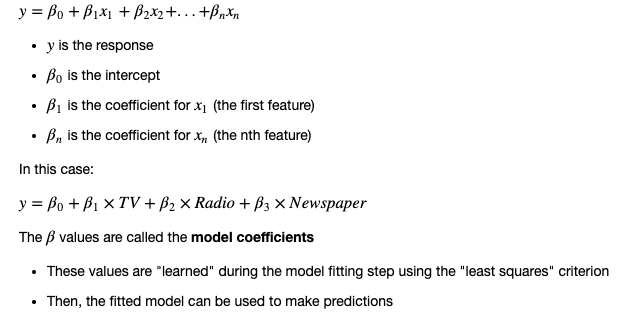
 
**Inference 1** 
Meaning of Coefficient 

E.g. TV Coefficient 0.0466

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

How $1,000? 
46.6 Units = 0.0466 x 1000 

**Inference 2**

If an increase in TV ad spending was associated with a decrease in sales,  β1  would be negative.

In [4]:
print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

Slope:  [[0.04765436 0.18570508 0.00141887]]
Intercept:  [2.63221459]


In [5]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.6322 + 0.047654*TV + 0.18571*radio + 0.0014189*newspaper


# **Step 5: Make Predictions**

In [6]:
# make predictions on the testing set

y_pred = reg.predict(x_test)
#print(y_pred)

def myfunc(TV,radio,newspaper):
  Y = 2.877 + 0.046565*TV + 0.17916*radio + 0.0034505*newspaper
  return Y
predictedsales = myfunc(39.5,41.1,10.8)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  12.117058900000002


In [7]:
def myfunc(TV,radio):
  Y = Y = 2.927 + 0.0466*TV + 0.1811*radio
  return Y
predictedsales = myfunc(39.5,41.1)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  12.21091



# **Step 6: Model Evaluation Metrics for Regression**
**Note:** Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Three common evaluation metrics for regression problems are:



In [8]:
from sklearn.metrics import mean_absolute_error 
predictions = reg.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.2676494685957282


In [9]:
from sklearn.metrics import mean_squared_error
predictions = reg.predict(x_test)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)

Mean Squared Error =  2.616909623569481


In [10]:
from sklearn.linear_model import LinearRegression
predictions = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  1.6176865034886954


In [11]:
reg.score(Xs, y)

0.8961096019664091

# **Step : Visualize the data**

Using seaborn package as it has advanced visualization features 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


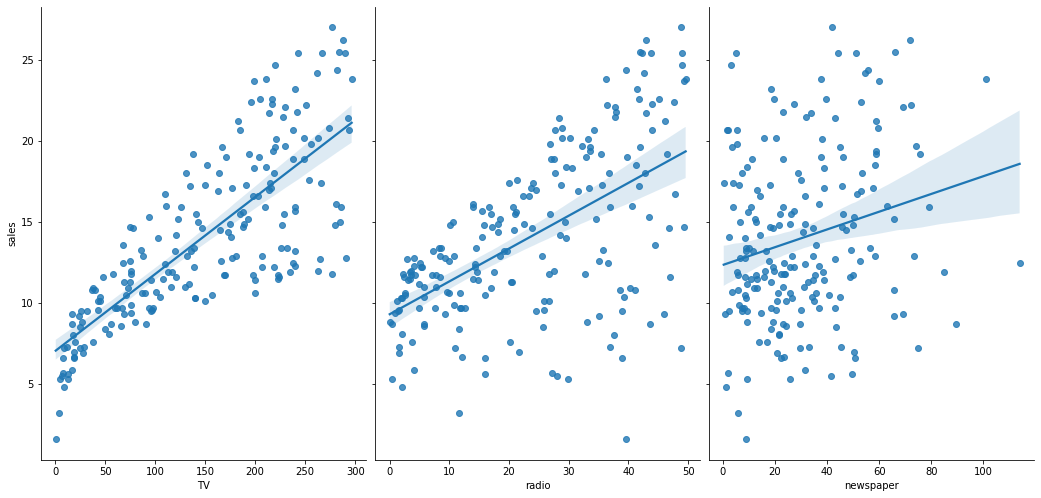

In [12]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [13]:
#create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
Y = data.sales

# split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# fit the model to the training data (learn the coefficients)
reg.fit(X_train, Y_train)

print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

print("The linear model is: Y = 2.927 + 0.0466*TV + 0.1811*radio")

# make predictions on the testing set
Y_pred = reg.predict(X_test)

Slope:  [0.04660234 0.18117959]
Intercept:  2.9272373202664816
The linear model is: Y = 2.927 + 0.0466*TV + 0.1811*radio


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


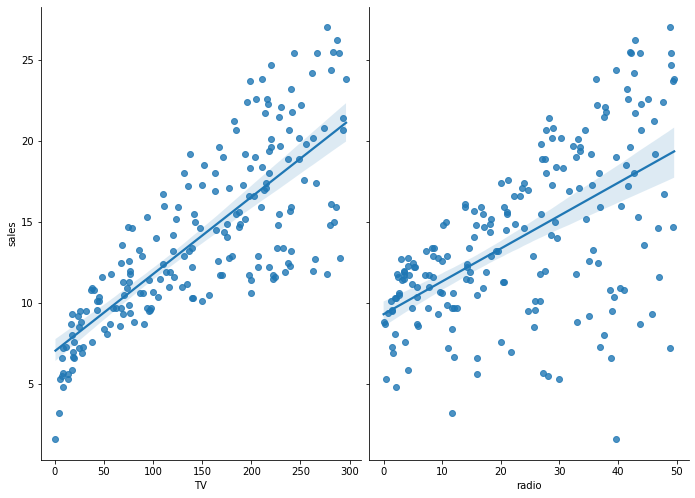

In [14]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [15]:

from sklearn.metrics import mean_absolute_error,  mean_squared_error
predictions = reg.predict(X_test)
mae = mean_absolute_error(Y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.0477590411212605


In [16]:
predictions = reg.predict(X_test)
mae = mean_squared_error(Y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.9262760418667433


In [17]:
# compute the RMSE of our predictions
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  1.387903469938289


In [18]:
reg.score(X, y)

0.8966248862712952

# **Inference:**
The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.

Thus, it is unlikely that this feature (Newspaper)is useful for predicting Sales, and should be removed from the model.